<h1><center><font size=10>An Analysis of Waiters' Tips</center></font></h1>
<h1><center>Area Specific Data Visualization and EDA</center></h1>

  <img src="hotel_tips.jpg" style = "width:700px;height:200px"></center>
  <b><h2><center>A Case Study on Waiter's Tips </center></h2></b>
  <b><h2><center>- Yash Dubbaka</center></h2></b>

### **Overview**
A tip is a sum of money customarily given by a customer to certain service sector workers, for the hospitality of the service they have performed. This is in addition to the basic price of the service. 
Its customary to tip servers in bars and restaurants, taxi drivers, hair stylists, etc.

In the United States, restaurants expect diners to tip their servers. Such tips are a key part of the culinary economy. 
These tips subsidize a servers salary and are a very important part of motivation to work at Restaurants.

One waiter recorded information about each tip he received over a period of a few months working in a restaurant. He recorded 244 tips. 

**Acknowledgements**

This dataset was is from www.kaggle.com, but this data was reported in a collection of case studies for business statistics. 

Bryant, P. G. and Smith, M (1995) Practical Data Analysis: Case Studies in Business Statistics. Homewood, IL: Richard D. Irwin Publishing

### **Objective**
My cousin who is working through med school suggested that I take up a waitressing job. He said I would learn to prioritize issues in a timely and correct manner. 

So, when I came across this dataset of tips on Kaggle, I couldnt help but analyze it. 
-  I would like to identify patterns and trends in revenue and tips received from the customers across different demographies. 
-  I would also like to come up with some informative Visualizations and EDA. 

The dataset consists of the following attributes/columns: 
- **order_id**: Unique identifier of each order
- **day**: The day of the week the customer visited the restaurant (Sun-Sat)
- **time**: Time of the day at which the customer visited the restaurant (Lunch or Dinner)
- **size**: Number of people present at the table
- **smoker**: Whether the table included smokers (No: The table did not include smokers, Yes: The table included smokers)
- **sex**: Gender of the person who paid the bill (Male or Female)
- **total_bill**: The bill amount in dollars
- **tip**: The tip amount in dollars


### **Importing the required libraries**
Importing the required libraries upfront so that the working is smoother. 

In [1]:
import numpy as np
import pandas as pd
# These libraries help with reading and manipulating data


import matplotlib.pyplot as plt
import seaborn as sns
# These libraries help with data visualization

%matplotlib inline
# This helps with displaying graphs without using the print command.

### **Loading the dataset**
Reading the dataset from my local computer. I have downloaded it from www.kaggle.com. 

In [2]:
# read the dataset
tips = pd.read_csv("C:/Users/mithu/Documents/Allout/Yashwant_R/Projects/Hotel_tips_EDA_Visualization/tips.csv")

FileNotFoundError: ignored

### **Getting acquainted with data set**
**Approch**
-  I want to see the first few rows of the dataset and confirm that the dataset is loaded properly.
-  I want to find out the data types of each column (attribute), what format it is stored in, and make sure the value of each column is as expected.
-  I would also want to see some statistical summarizes of the dataset to get a better understanding of the numerical columns. 

#### **Displaying the first 5 rows of the dataset**

In [ ]:
tips.head()

,order_id,day,time,size,smoker,sex,total_bill,tip
0,1,Sun,Dinner,2,No,Female,16.99,1.01
1,2,Sun,Dinner,3,No,Male,10.34,1.66
2,3,Sun,Dinner,3,No,Male,21.01,3.50
3,4,Sun,Dinner,2,No,Male,23.68,3.31
4,5,Sun,Dinner,4,No,Female,24.59,3.61


##### **Observations**
-  There is information about customers who visited the restaurant. 
-  It carries information like:
    -  A system generated order ID
    -  The day of week
    -  Time of visit
    -  Number of people
    -  Whether smokers ordered or not
    -  Gender
    -  Total bill amount
    -  Tips paid.

#### **Lets have look at the diamensions of data**

In [ ]:
tips.shape

(244, 8)

-  This dataset consists of 244 observations of 8 attributes. 
-  I will find patterns in the tips and analyze the data.

#### **Looking at the data types of the columns/attributes of the dataset**

In [ ]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    244 non-null    int64  
 1   day         244 non-null    object 
 2   time        244 non-null    object 
 3   size        244 non-null    int64  
 4   smoker      244 non-null    object 
 5   sex         244 non-null    object 
 6   total_bill  244 non-null    float64
 7   tip         244 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


**Observations**
-  *I can see that `order-id`, `total_bill`, and `tip` are numerical attributes and the others are categorical data points* 
-  I can also see `order-id` is number assigned to each order. It might be some kind of identifier. However it doesn't have much value in any kind of analysis. 
-  I am droping `order-id` from further analysis

In [ ]:
tips.drop('order_id', axis=1, inplace=True)

In [ ]:
tips.head() # Checking if Order-id was dropped.

,day,time,size,smoker,sex,total_bill,tip
0,Sun,Dinner,2,No,Female,16.99,1.01
1,Sun,Dinner,3,No,Male,10.34,1.66
2,Sun,Dinner,3,No,Male,21.01,3.50
3,Sun,Dinner,2,No,Male,23.68,3.31
4,Sun,Dinner,4,No,Female,24.59,3.61


-  `Order-id` was dropped from the data object tips.

#### **Some statistical summaries of numerical attributes of data**

In [ ]:
tips.describe()

,size,total_bill,tip
count,244.000000,244.000000,244.000000
mean,2.569672,19.785943,2.998279
std,0.951100,8.902412,1.383638
min,1.000000,3.070000,1.000000
25%,2.000000,13.347500,2.000000
50%,2.000000,17.795000,2.900000
75%,3.000000,24.127500,3.562500
max,6.000000,50.810000,10.000000


**Observations**
-  For attribute `size` which is the number of people on the table:
    -  we have 244 observations.
    -  The mean size is 2.56 (this is good - the more the merrier for staff in terms of tips) 
    -  Standard deviation of size is 0.95. (This looks reasonable) 
    -  Minimum size is obviously 1 person on a table. 
    -  First quartile of size is 2.
    -  Median size is 2
    -  Third quartile is at 3 individuals on table. 
    -  Maximum we have seen is 6 individuals on a table.
-  For the `total_bill` attribute, which is the bill amount in dollar terms. 
    -  we have 244 observations.
    -  The mean bill amount is 19.78.
    -  Standard deviation a measure of variation stands at 8.90
    -  The minimum bill amount was 3.07
    -  First quartile was at 13.34.
    -  Median bill amount was at 17.79
    -  Third quartile was at 24.12
    -  Finally the maximum bill value was seen at 50.81
-  For the `tip` attribute, which tip amount paid in dollar terms we can see the following:
    -  we have 244 observations. 
    -  The mean tip amount is 2.99 dollars.
    -  The standard deviation stands at 1.38 dollars. 
    -  The minimum tip amount was 1 dollar. 
    -  First quartile stood at 2 dollars
    -  Median tip is at 2.90 dollars. 
    -  Third quartile was at 3.56 dollars. 
    -  Maximum tip amount was seen at 10 dollars. 
    
    

-  *So i have seen the data on the surface and have some idea. I would now like to see the distribution of each column to know the data better.*
-  *I will start with the numerical attributes and use histplot and boxplot on these numerical attributes* 
-  *Both Histplot and boxplot will give me better understanding of the underlying distribution of data*

#### **Understanding distribution of `Size`**

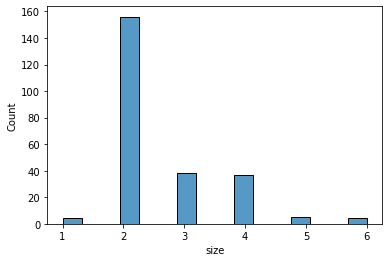

In [ ]:
sns.histplot(data=tips, x='size');

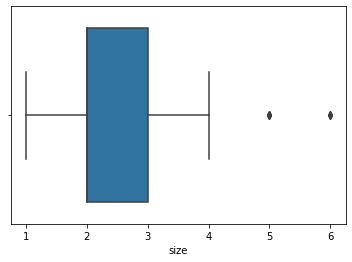

In [ ]:
sns.boxplot(data=tips, x="size");

#### Observations:
-  Around 155 guests out of 244 came in groups of 2. 
-  *50% of the groups have 2 to 3 people in them.*

#### **Understanding `total_bill` attribute**

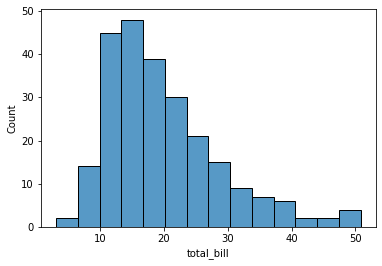

In [ ]:
sns.histplot(data=tips, x='total_bill');

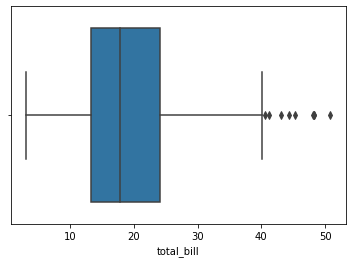

In [ ]:
sns.boxplot(data=tips, x="total_bill");

**Observations**
-  This attribute is a bit skewed to the right. 
-  Half of the guests order for less than 17 dollars. 
-  50% orders fetch the restuarant somewhere about 12 to 25 dollars.

#### **Understanding the distribution of tip**

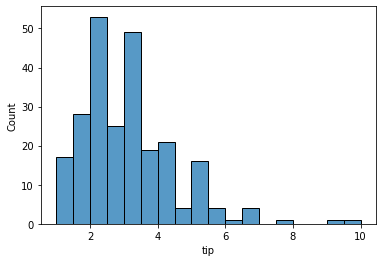

In [ ]:
sns.histplot(data=tips, x='tip');

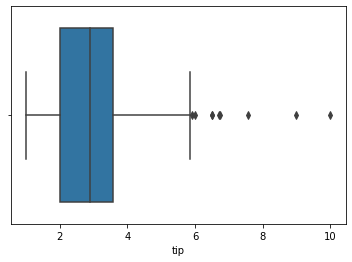

In [ ]:
sns.boxplot(data=tips, x="tip");

**Observations**
-  The `tip` attribute is slightly right-skewed. 
-  Around 50% of the guests tip less than 3 dollars.
-  The inter-quartile range or half of guests pay a tip amount anywhere between 2 to 4 dollars.

### **With exposure to the numerical attributes of the dataset, I would like to do something similar with categorical attributes and i can use the count plot to check their distribution.**

#### **Lets look at the distribution of `day` attribute**

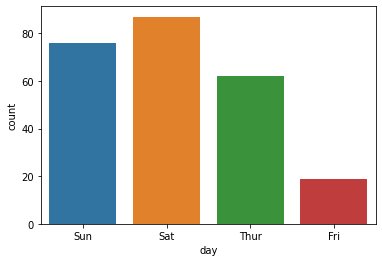

In [ ]:
sns.countplot(data=tips, x='day');

**Observation:**
-  Obviously the number of orders is more during the weekends than the weekdays. 
-  Saturday is busier than sunday. 
-  Looks like this restuarant is open only for 4 days.

#### **Lets look at distribution of `time` attribute**

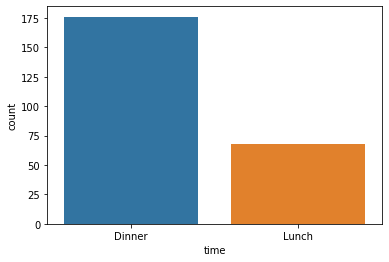

In [ ]:
sns.countplot(data=tips, x='time');

**Observation**
-  This restaurant receives more guests for dinner than for lunch.

#### **Lets look at the distribution of `sex` or the gender attribute**

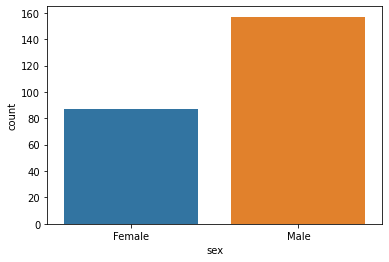

In [ ]:
sns.countplot(data=tips, x='sex');

**Observations**
-  `Sex` attribute marks the gender of the bill payer.
-  It looks like males are usually the bill payers or maybe men eat out more. (Both are good hypothesis to test).
-  We have 155 male paying bills and 85 females paying bills. 


#### **Lets look at the distribution of `smoker` attribute**

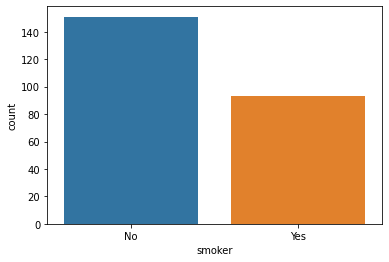

In [ ]:
sns.countplot(data=tips, x='smoker');

**Observation**
-  There are more non smoking table than smoking tables. 

#### **I have looked at distribution of each individual attributes. I would like to explore relationships between the various attributes, so as to find some meaningful patterns and trends from them. Heatmap can help us see correlation between the numerical attributes.**

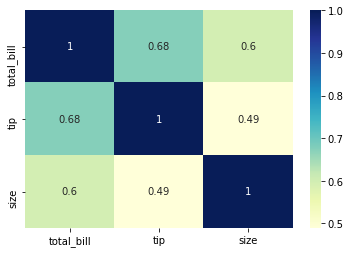

In [ ]:
sns.heatmap(data=tips[['total_bill','tip','size']].corr(), annot=True, cmap='YlGnBu');

**Observation**
-  So the `total-bill` and `tip` attributes are highly correlated. 
-  The `total-bill` and `size` attributes are also highly correlated and it makes sense as more member as guests in a group mean more bill amount. 
-  `tip` and `size` also have a reasonablly strong correlation. 

#### **`total-bill` and `tip` attributes are highly correlated with each other. Let me visualize this relationship.**

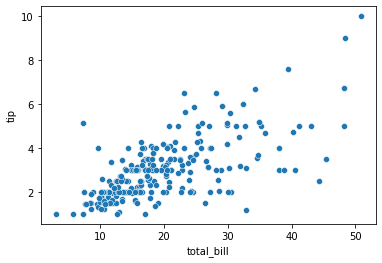

In [ ]:
sns.scatterplot(data=tips, x='total_bill', y='tip');

**Observation**
-  As the `total-bill` increases the `tip` also increases. 
-  A jointplot could be interesting.

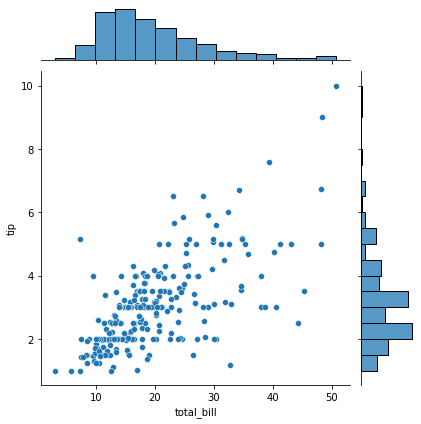

In [ ]:
sns.jointplot(data=tips, x='total_bill', y='tip');

#### I am creating hexbin plot by setting kind = 'hex' to take care of the overlapping points.

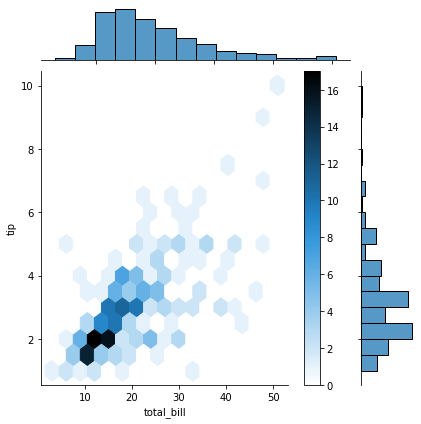

In [ ]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='hex')
plt.colorbar(); # this adds a separate axis indicating the color scale in this plot

**Observation**
-  It looks like there is a cluster of points in the region where the billing amount ranges from 8 to 16 dollars and the tip amount ranges from 1 to 2 dollars. 

#### **Pairplot of `tip` and `total-bill` will be interesting**

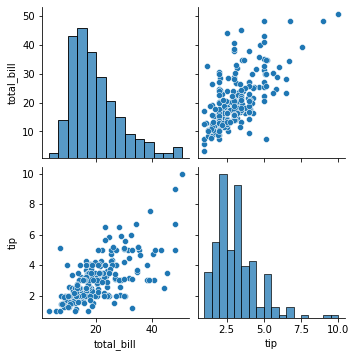

In [ ]:
sns.pairplot(data = tips[['total_bill','tip']]);

**Observation**
-  We can see a linear relationship between `total_bill` and `trip` that means as the bill amount increases the tip amount increases. 

#### **Is the relationship between `total_bill` and `tip` valid with respect to the gender of the bill payer, smoking status, days and time?**

**`Total-bill` and `tip` in the light of `Sex`**

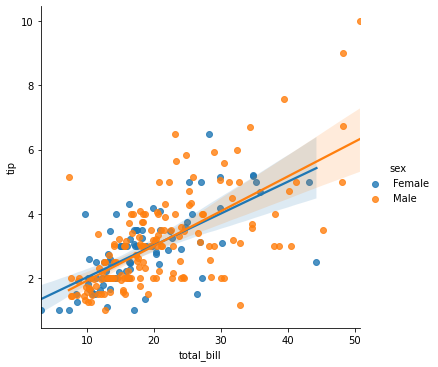

In [ ]:
sns.lmplot(data = tips, x = 'total_bill', y = 'tip', hue='sex');

**Observations**
-  The relationship between `total-bill` and `trip` is linear and is the same for both the genders. 


Total-bill and tip in the light of `Smoker`

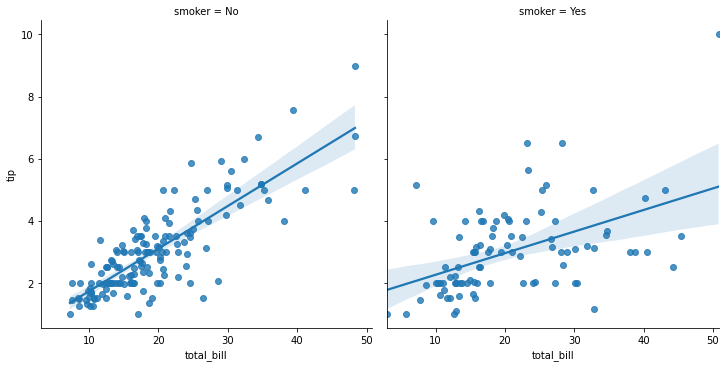

In [ ]:
sns.lmplot(data = tips, x = 'total_bill', y = 'tip', col = 'smoker');

**Observation**
-  More or less the same upward sloping linear relationship whether smoker or non smoker table. 

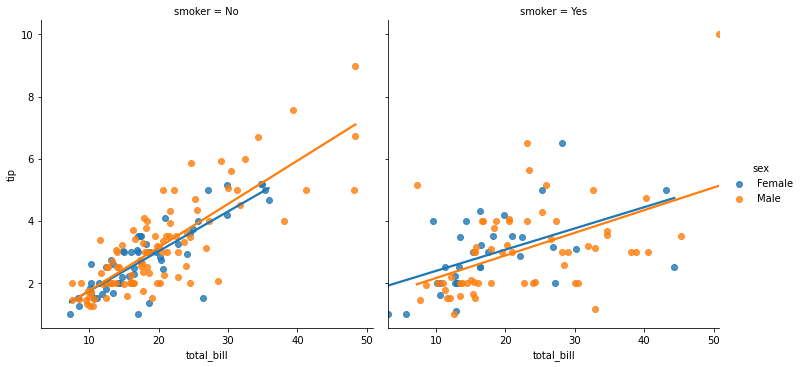

In [ ]:
sns.lmplot(data=tips, x='total_bill', y='tip', hue='sex', col='smoker', ci=False);

**Observation**
-  The highest tip was given by male who was smoker.
-  Non smokers show a more prominent linear relationship between `total_bill` and `tip` as compared to smokers.

Total-bill and tip in the light of `day` of week

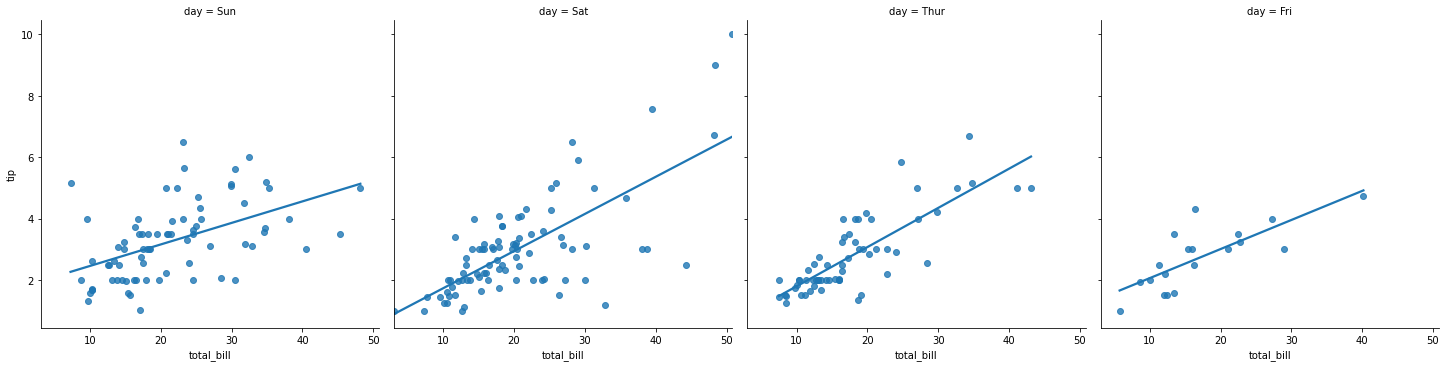

In [ ]:
sns.lmplot(data = tips, x = 'total_bill', y = 'tip', col = 'day', ci=False);

Total-bill and tip in the light of `time` of eating.

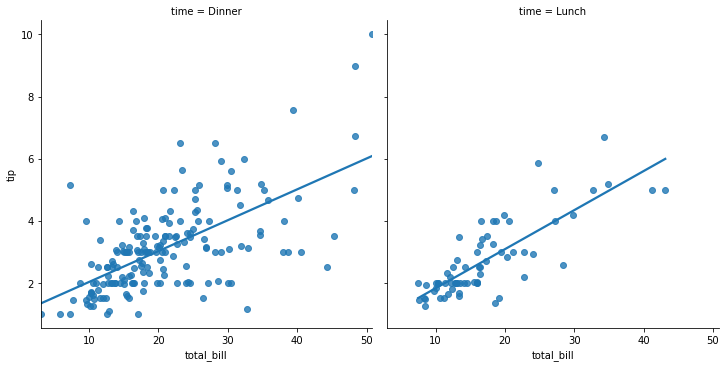

In [ ]:
sns.lmplot(data = tips, x = 'total_bill', y = 'tip', col = 'time', ci=False);

Total-bill and tip in the light of `size` of the group.

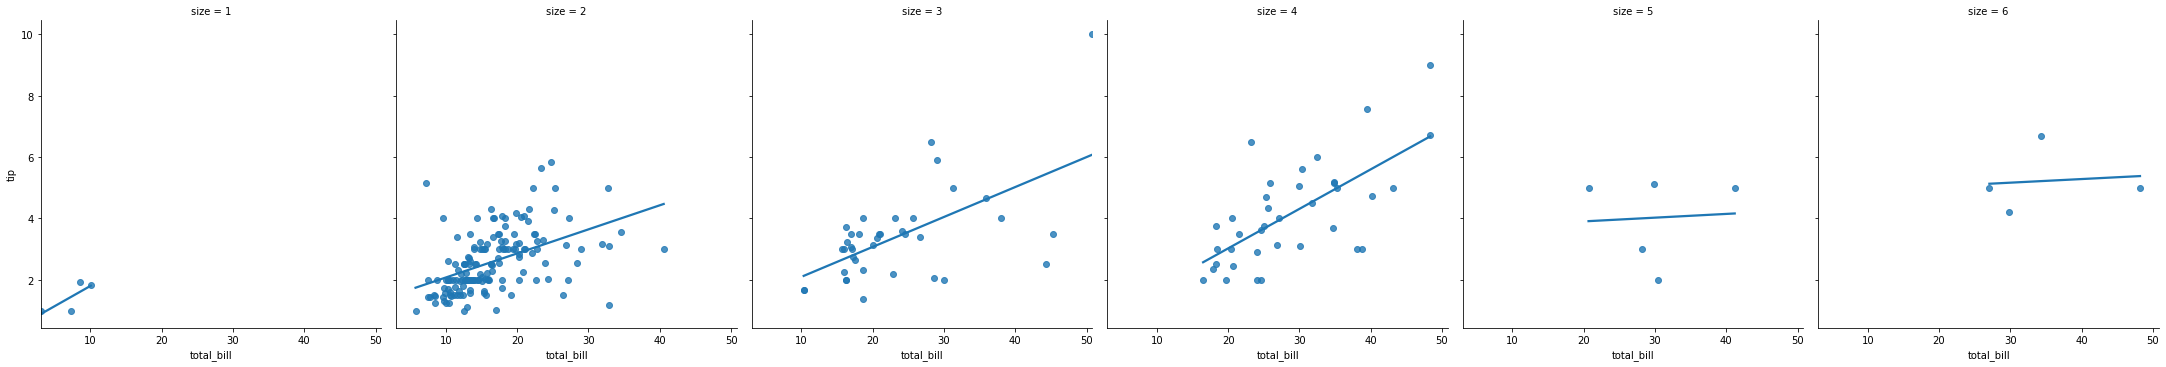

In [ ]:
sns.lmplot(data = tips, x = 'total_bill', y = 'tip', col = 'size', ci=False);

**Observation**
-  The relationship between `total-bill` and `tip` is mostly linear with respect both day and time. 
-  However with respect to `size` of the group, this relationship looks like a uniform (or constant) distribution as the `size` of the group increases.

#### **One question - How does the bill amount and tip vary with respect of the day of visit?**

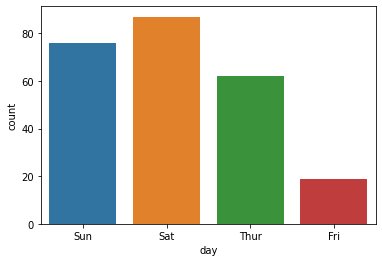

In [ ]:
sns.countplot(data=tips, x='day');

**Observation**
-  We know there are more orders on weekend, particularly on Saturday and hence the tip is also high. 

**Lets explore `total-bill` distribution accross different `days` of week.**

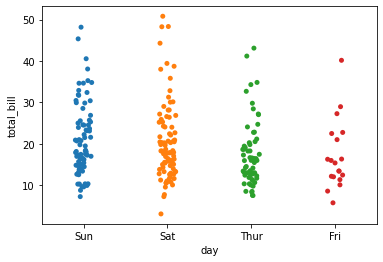

In [ ]:
sns.stripplot(data=tips,x='day',y='total_bill',jitter=True);
# jitter adds to avoid overlapping data points by adding random voice. 

**Some more fun using a swarplot & boxplot**

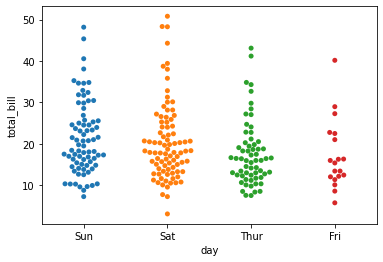

In [ ]:
sns.swarmplot(data=tips, x='day',y='total_bill');

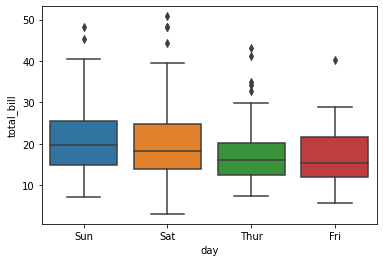

In [ ]:
sns.boxplot(data=tips, x='day', y='total_bill');

**Observation** 
-  The number of orders are lower on Fridays as compared to other days. 
-  Saturdays are the make or break days. 
-  However the median billing amount on sunday is higher than on saturday. 

**Lets explore `tip` distribution accross different `days` of week.**

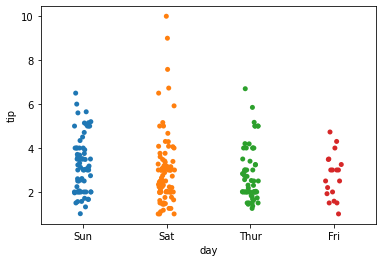

In [ ]:
sns.stripplot(data=tips,x='day',y='tip',jitter=True);
# jitter adds random noise to data points and it helps overcome overlap problem.

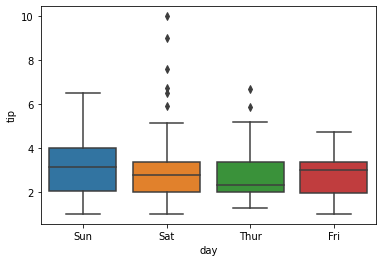

In [ ]:
sns.boxplot(data=tips, x='day', y='tip');

**Observation**
-  Suprisngly, the median tip amount is almost equal for `Friday, Saturday` and `Sunday`. This may be because of the weekend effect. 

**Now i already know that the number of orders at the restaurant tend to be higher during the dinner time as compared to lunch.**

**So, which time of the day bring higher bill and tip amounts?**

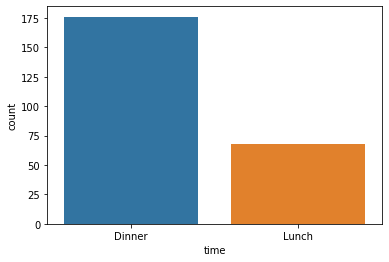

In [ ]:
sns.countplot(data=tips, x='time');

**Observation**
-  Dinner orders is more than 200% higher than lunch orders. 

**Lets explore `total_bill` distribution accross different `time` of orders.**

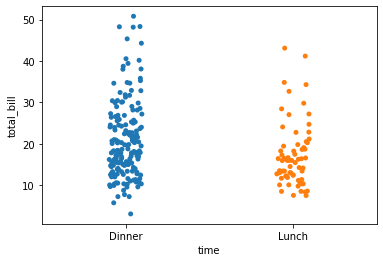

In [ ]:
sns.stripplot(data=tips,x='time',y='total_bill',jitter=True);

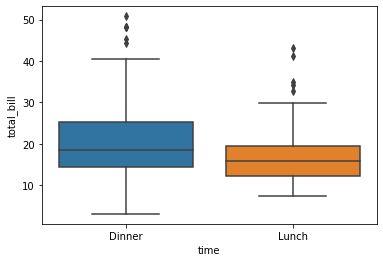

In [ ]:
sns.boxplot(data=tips, x='time', y='total_bill');

**Observations**
-  So it looks 50% of the customers spend more than 19 dollars on the overall bill during the dinner time as compared to 16 dollars during lunch.

**Lets explore `tips` distribution accross different `time` of orders.**

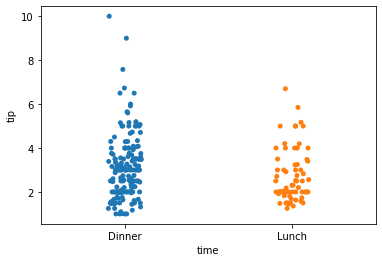

In [ ]:
sns.stripplot(data=tips,x='time',y='tip',jitter=True);

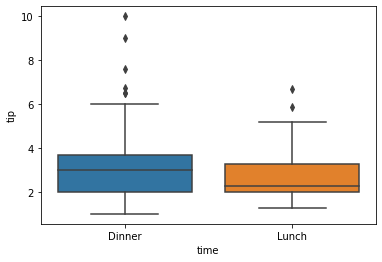

In [ ]:
sns.boxplot(data=tips, x='time', y='tip');

**Observations**
-  The median tip amount given during dinner is almost 1 dollar higher than that given during lunch time. 

**We have done the analysis of the `day` of the week and `time` of the day attributes. Let's also answer some questions on the other two categorical attributes viz `sex` and `smoker`**

**Realistically, the tip amount should not vary a lot among the gender of the bill payer. Lets check if this hypothess is true for this data? Also what's the count of male and female bill payers visiting each day of the week?**

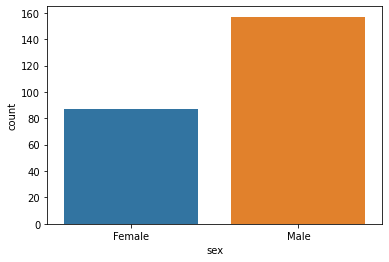

In [ ]:
sns.countplot(data=tips, x='sex');

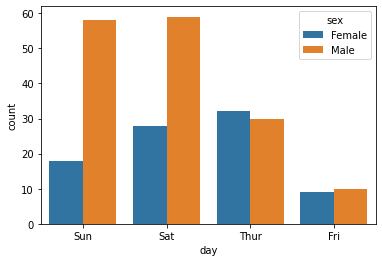

In [ ]:
sns.countplot(data=tips, x='day', hue='sex');

**Observations**
-  The number of males paying the bill is almost double that of the female payers.
-  This is primarily because on weekends we have lot more guests and most of them are male bill payers. 
-  We can see the trend reversal for Thursday where we find more female payers than male bill payers. 

**Does the tip vary in conditional to gender of the bill payers?**

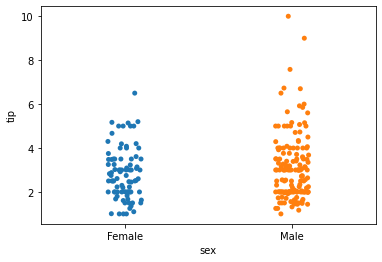

In [ ]:
sns.stripplot(data=tips, x='sex', y='tip');

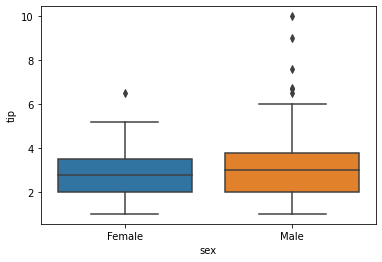

In [ ]:
sns.boxplot(data=tips, x='sex', y='tip');

**Observations**
-  This is interesting the median value of `tip` is almost the same for both male & female payers. 
-  However we see alot more outliers for male payers doling out higher tips. 

**What sort of tip distribution can be seen between smokers and non smokers? Is there an effect on tip if the payer is smoker?**

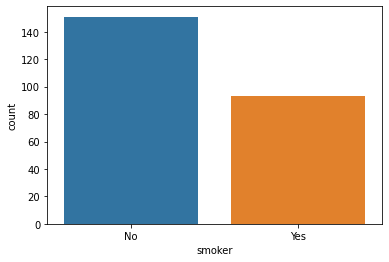

In [ ]:
sns.countplot(data=tips, x='smoker');

<AxesSubplot:xlabel='day', ylabel='count'>

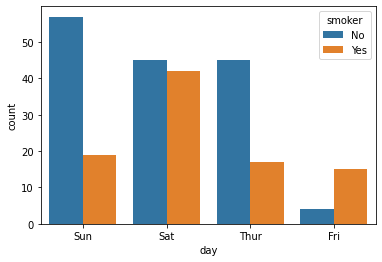

In [ ]:
sns.countplot(data=tips, x='day', hue='smoker')

**Observations**
-  Most tables are occupied by non smokers.
-  The number of smokers are significantly higher on saturdays. On the other 3 days its kind of constant. 
-  On friday we see more smokers than non smokers which is kind of trend reversal. 

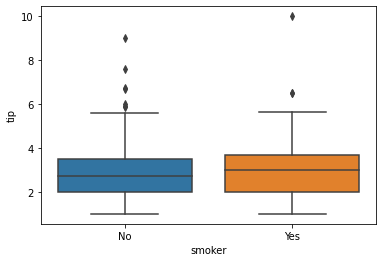

In [ ]:
sns.boxplot(data=tips, x='smoker', y='tip');

**Observations**
-  The smokers seem to be slightly better tippers than non-smokers based in the median tips. 


**Conclusions**
-  `Bill Amount`
    -  The bill amount can be as low as 3 dollars and as high as 50 dollars.
    -  The average bill amount is around 20 dollars. 
    -  About 50% of bill amount is less than 18 dollars.
    
-  `Tip Amount`
    -  The tip can seen to go as low as 1 dollar and as high as 10 dollars.
    -  The mean and median tip value is roughly 3 dollars. 
    
-  `Size` of Group
    -  The number of guests in a group can vary from 1 to 6 persons. 
    -  Around 50% of the people pay less than 20 dollars in bill. 
    -  Around 50% of the people pay less than 3 dollars as tip. 
    
-  There is a linear relationship between `total bill` amount and `tip` paid. 
-  This linear relationship holds true across `Gender`, `day`and `time`.
-  We can say the same when looked from the spectrum of `smoker` attribute. Non smokers show more strong linear relationship (expressed by the slope of line) between `total_bill` and `tip` as compared to smokers. 
-  This was an interesting observation - as the `size` of the group increases, the relationship between `total_bil` and `tip` becomes uniform or constant.
-  The number of orders is higher on weekends.
-  The number of orders at dinner is significantly higher than lunch. 
-  The billing on weekends is higher. As a result, the median `total_bill` on weekends is also higher. 
-  The median `tip` on Friday, saturday and sunday is almost the same and is higher than the median tip on Thursday. 
-  The median value for `tip` is almost equal for both the genders of payers. 
-  Males tend to vary lot more in terms of `tip` payment as they have lot more outliers as compared to females. 
-  Non smokers as class is majority over smokers who are minority class. 
-  The number of non-smokers is significantly higher than the number of smokers on Thursdays and Sundays. 
-  On Fridays the number of smokers is higher than the number of non-smokers.
-  There is no relation between smoking status and tips since the median tip is almost the same. However the smokers tend to be slightly more generous tippers. 
    

**My Thoughts**

I might pursue my cousins offer. I have a friend who said he could get me a job at Panera Bread. It would be fasinating to see up close how a restuarant operations work. It's definitely a good space to meet new people and develop a service bent mindset. It's also a great place do some analytics, understand people's consumption patterns, and experience their reactions. 